In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("data.csv")
feature_cols = ['moisture', 'temp']
X = data[feature_cols] 
y = data.pump
print(data.describe())
print(data.groupby('pump').size())

          moisture        temp        pump
count   200.000000  200.000000  200.000000
mean    633.085000   27.750000    0.750000
std     279.077118   10.869602    0.434099
min       4.000000   10.000000    0.000000
25%     500.500000   18.000000    0.750000
50%     693.500000   28.000000    1.000000
75%     850.750000   38.000000    1.000000
max    1022.000000   45.000000    1.000000
pump
0     50
1    150
dtype: int64


Accuracy: 0.9875
[[61  1]
 [ 0 18]]


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


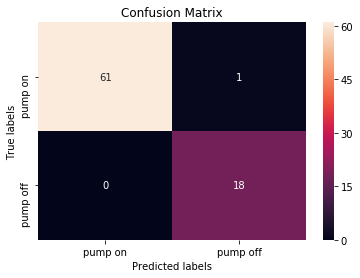

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
y_pred = tr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
labels=[1,0]
print(confusion_matrix(y_test, y_pred,labels))
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred,labels), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pump on', 'pump off']); ax.yaxis.set_ticklabels(['pump on', 'pump off']);

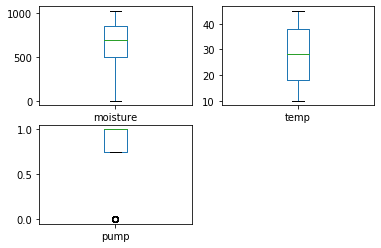

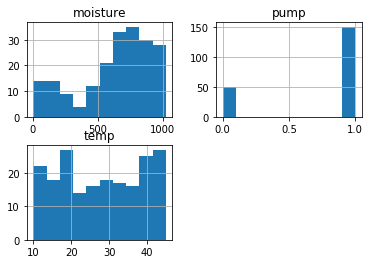

In [4]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
data.hist()
plt.show()


In [5]:
new_input = [[503,200]]
new_output = tr.predict(new_input)
print(new_input, new_output)

[[503, 200]] [0]


In [6]:
new_input = data.iloc[-1:,1:3].values
new_output = tr.predict(new_input)
print(new_input, new_output)

[[979  10]] [1]


In [7]:
new_input = X.tail(1)
new_output = tr.predict(new_input)
print(new_input, new_output)

     moisture  temp
199       979    10 [1]


[Text(139.5, 407.70000000000005, 'X[0] <= 503.0\nentropy = 0.837\nsamples = 120\nvalue = [32, 88]'),
 Text(69.75, 135.89999999999998, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 88\nvalue = [0, 88]')]

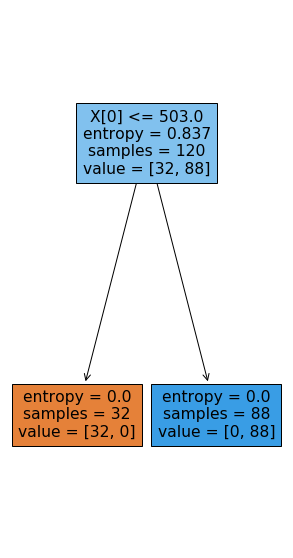

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
data = pd.read_csv("data.csv")
feature_cols = ['moisture', 'temp']
X = data[feature_cols] 
y = data.pump
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
plt.figure(figsize=(5,10))
tree.plot_tree(tr,filled=True)

In [9]:
print(tree.export_text(tr))

|--- feature_0 <= 503.00
|   |--- class: 0
|--- feature_0 >  503.00
|   |--- class: 1



In [10]:
import pickle
pickle.dump(tr, open('pumppredict.pkl', 'wb'))